# DATA EXPLORATION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,log_loss
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [2]:
data = pd.read_csv("Glass.csv")
data.head()

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   AI      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:ylabel='RI'>

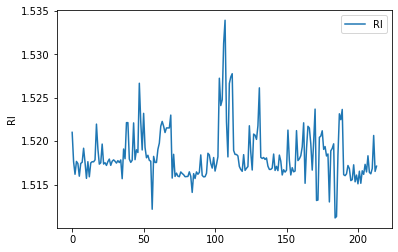

In [5]:
sns.lineplot(data=data["RI"],label="RI")

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mg'>

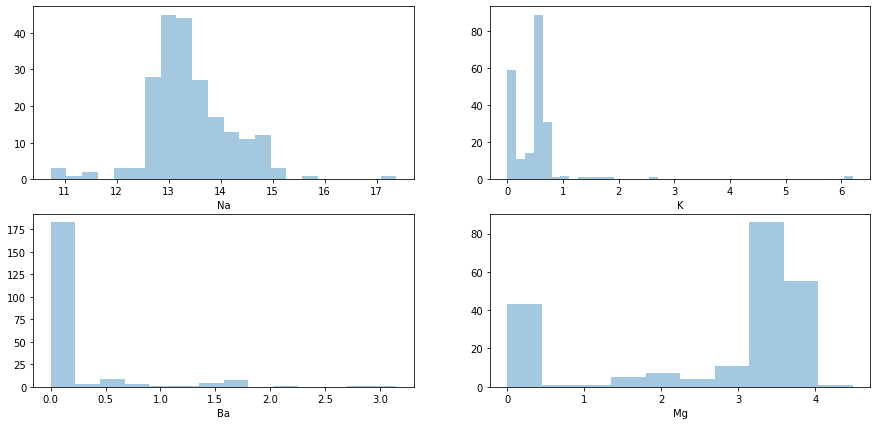

In [6]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.distplot(a=data["Na"],kde=False)
fig.add_subplot(2,2,2)
sns.distplot(a=data["K"],kde=False)
fig.add_subplot(2,2,3)
sns.distplot(a=data["Ba"],kde=False)
fig.add_subplot(2,2,4)
sns.distplot(a=data["Mg"],kde=False)

<AxesSubplot:xlabel='RI', ylabel='Type'>

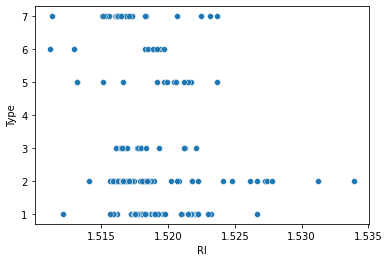

In [7]:
sns.scatterplot(x=data["RI"],y=data["Type"])

<AxesSubplot:xlabel='RI', ylabel='Type'>

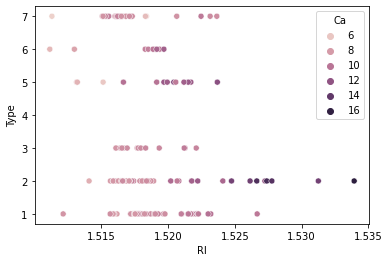

In [8]:
sns.scatterplot(x=data["RI"],y=data["Type"],hue=data["Ca"])

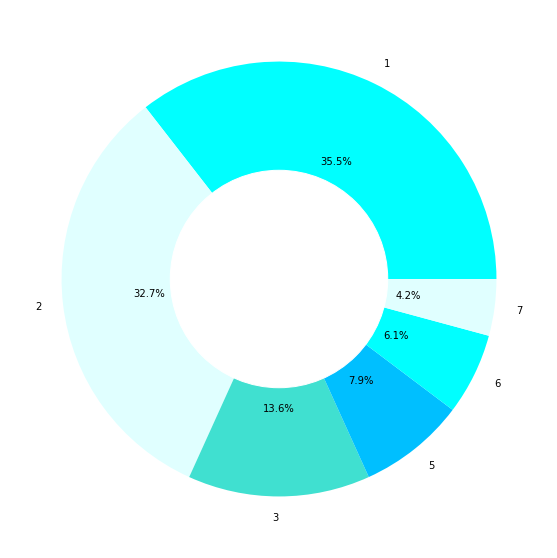

In [9]:
valuecount=data['Type'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(valuecount, labels=[1,2,3,5,6,7], colors=['cyan','lightcyan','turquoise','deepskyblue','cyan','lightcyan','turquoise'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# DATA PREPROCESSING 

In [10]:
data["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [11]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
data[data["Type"]==1]=0
data[data["Type"]==2]=1
data[data["Type"]==3]=2
data[data["Type"]==5]=3
data[data["Type"]==6]=4
data[data["Type"]==7]=5

In [13]:
data["Type"].unique()


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [14]:
X=data.drop(["Type"],axis=1)
Y=data["Type"]

# MODELING AND EVALUATION

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.naive_bayes import BernoulliNB
model1=BernoulliNB()
model1.fit(X_train,Y_train)

BernoulliNB()

In [17]:
pred1=model1.predict(X_test)
print("Confusion_matrix of Naive Bayes Classifier\n",confusion_matrix(Y_test,pred1))
print("\nAccuracy score of Naive Bayes Classifier",accuracy_score(Y_test,pred1)*100)
print("\nF1 score of Naive Bayes Classifier",f1_score(Y_test,pred1,average="macro"))


Confusion_matrix of Naive Bayes Classifier
 [[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  4  0  0  0  0]]

Accuracy score of Naive Bayes Classifier 72.09302325581395

F1 score of Naive Bayes Classifier 0.2916666666666667


In [18]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [19]:
cross_val_score(BernoulliNB(),X,Y,cv=cv)

array([0.65116279, 0.65116279, 0.62790698, 0.48837209, 0.60465116])

In [20]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,criterion="gini")
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
pred2=model2.predict(X_test)
print("Confusion_matrix of Random Forest Classifier\n",confusion_matrix(Y_test,pred2))
print("\nAccuracy score of Random Forest Classifier",accuracy_score(Y_test,pred2)*100)
print("\nF1 score of Random Forest Classifier",f1_score(Y_test,pred2,average="macro"))

Confusion_matrix of Random Forest Classifier
 [[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]

Accuracy score of Random Forest Classifier 100.0

F1 score of Random Forest Classifier 1.0


In [22]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [23]:
cross_val_score(RandomForestClassifier(),X,Y,cv=cv)

array([1., 1., 1., 1., 1.])

In [24]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion="gini")
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [25]:
pred3=model3.predict(X_test)
print("Confusion_matrix of Decision Tree Classifier\n",confusion_matrix(Y_test,pred3))
print("\nAccuracy score of Decision Tree Classifier",accuracy_score(Y_test,pred3)*100)
print("\nF1 score of Decision Tree Classifier",f1_score(Y_test,pred3,average="macro"))

Confusion_matrix of Decision Tree Classifier
 [[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]

Accuracy score of Decision Tree Classifier 100.0

F1 score of Decision Tree Classifier 1.0


In [26]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeClassifier(),X,Y,cv=cv)

array([1., 1., 1., 1., 1.])

In [27]:
#pip install xgboost


In [28]:
import xgboost as xg
print(xg.__version__)

1.6.1


In [29]:
from xgboost import XGBClassifier
model4=XGBClassifier()
model4.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [30]:
pred4=model4.predict(X_test)
print("Confusion_matrix of XG Boosting Classifier\n",confusion_matrix(Y_test,pred4))
print("\nClassification report of XG Boosting Classifier\n",classification_report(Y_test,pred4))
print("\nAccuracy score of XG Boosting Classifier",accuracy_score(Y_test,pred4)*100)
print("\nF1 score of XG Boosting Classifier",f1_score(Y_test,pred4,average="macro"))

Confusion_matrix of XG Boosting Classifier
 [[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]

Classification report of XG Boosting Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Accuracy score of XG Boosting Classifier 100.0

F1 score of XG Boosting Classifier 1.0


In [31]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(XGBClassifier(),X,Y,cv=cv)

array([1., 1., 1., 1., 1.])

In [32]:
data.loc[data['Type'] == 0, 'Type Name']= "building_windows_float_processed"
data.loc[data['Type'] == 1, 'Type Name']= "building_windows_non_float_processed"
data.loc[data['Type'] == 2, 'Type Name']= "vehicle_windows_float_processed"
data.loc[data['Type'] == 3, 'Type Name']= "containers"
data.loc[data['Type'] == 4, 'Type Name']= "tableware"
data.loc[data['Type'] == 5, 'Type Name']= "headlamps"


In [33]:
data.head(20)

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type,Type Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,building_windows_float_processed


In [34]:
data['Type Name'].unique()


array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [35]:
data['Type Name'].value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Type Name, dtype: int64

In [36]:
data.to_csv("modified_glass.csv",index=False)